# Installation du package xlrd de Python

In [1]:
#!pip install xlrd

---
# Réalisation du travail préparatoire demandé par le professeur

## Chargement des packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Chargement du jeu de données Titanic

In [3]:
df = pd.read_csv('D:/Dossier/Cours Master 1 GRAF/Python/Cours-python/Dataset/titanic3.csv', sep = ';')

## Affichage des premières lignes de données

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Information sur le dataset : types de variables, valeurs manquantes, etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(5), object(9)
memory usage: 143.4+ KB


## Statistique desciptive

In [6]:
df.describe()

,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,0.498854,0.385027,160.809917
std,0.837836,0.486055,1.041658,0.865560,97.696922
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,72.000000
50%,3.000000,0.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,1.000000,0.000000,256.000000
max,3.000000,1.000000,8.000000,9.000000,328.000000


## Vérifier les valeurs manquantes

In [7]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

## Pourcentage des passagers ayant survécus

In [8]:
(df["survived"].sum()/df["survived"].count())*100

38.19709702062643

## Diagramme à barres du nombre de survivants et non-survivants avec countplot

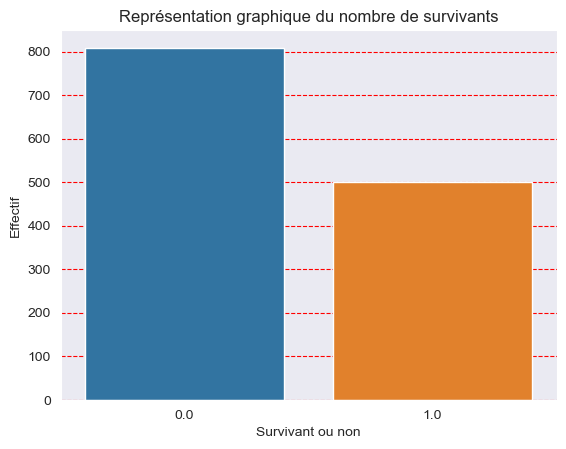

In [9]:
sn.set_style("darkgrid", {'grid.linestyle': '--', 'grid.color':'red'})
sn.countplot(df, x="survived")
plt.title("Représentation graphique du nombre de survivants")
plt.xlabel("Survivant ou non")
plt.ylabel("Effectif")
plt.show()

## Comparaison du taux de survie par sexe avec countplot

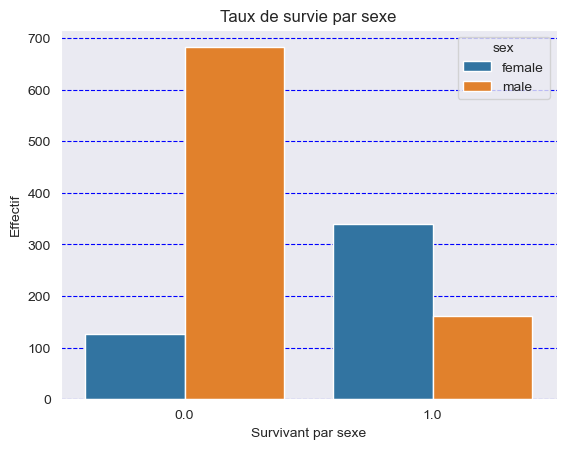

In [10]:
sn.set_style("darkgrid", {'grid.linestyle': '--', 'grid.color':'blue'})
sn.countplot(x='survived', hue='sex', data=df)
plt.title('Taux de survie par sexe')
plt.xlabel('Survivant par sexe')
plt.ylabel('Effectif')
plt.show()

## Taux de survie par sexea médiane

In [11]:
df_sex = df.groupby('sex')[['survived']].mean() * 100
df_sex

,survived
sex,
female,72.746781
male,19.098458


## Visualiser la survie par classe (avec countplot de seaborn)

AttributeError: 'numpy.float64' object has no attribute 'startswith'

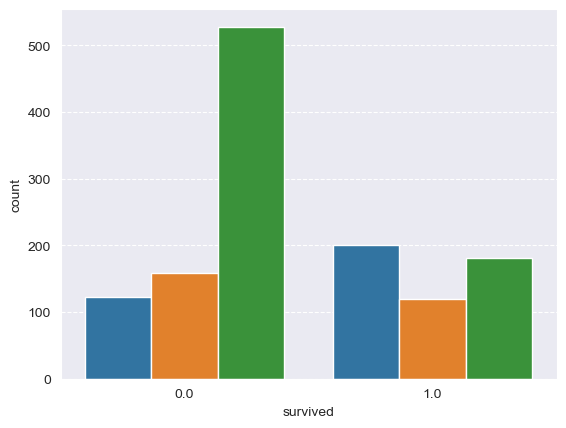

In [12]:
sn.set_style("darkgrid", {'grid.linestyle': '--', 'grid.color':'white'})
sn.countplot(x='survived', hue='pclass', data=df)
plt.title('Survie par classe')
plt.show()

## Taux de survie par classe

In [13]:
df_class = df.groupby('pclass')['survived'].mean() * 100
df_class

pclass
1.0    61.919505
2.0    42.960289
3.0    25.528914
Name: survived, dtype: float64

## Affichage de la distribution des âges (avec histplot de seaborn)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


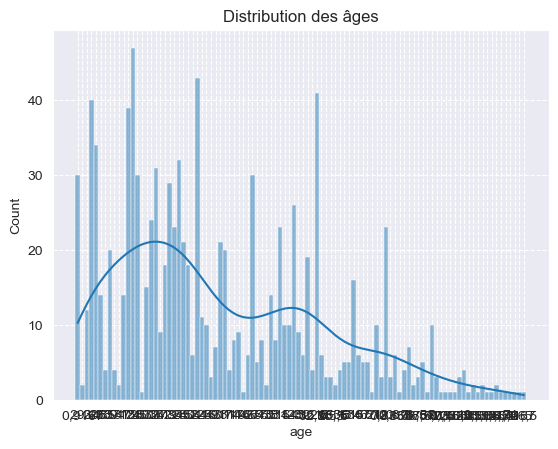

In [14]:
sn.histplot(df['age'].dropna(), kde=True)
plt.title('Distribution des âges')
plt.show()

## Boîte à moustache de l'âge et survie (Boxplot de seaborn)

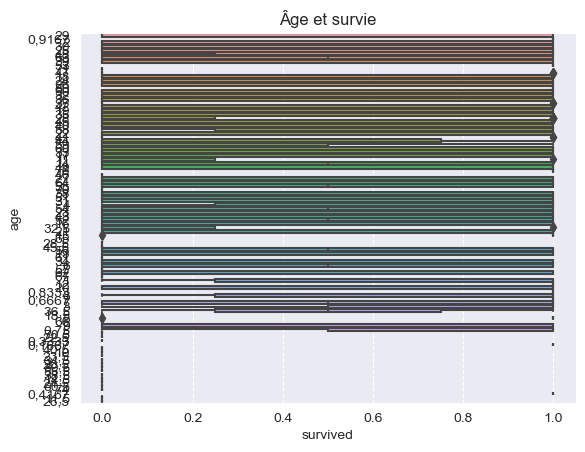

In [15]:
sn.boxplot(x='survived', y='age', data=df)
plt.title('Âge et survie')
plt.show()

## Statistiques d'âge des survivants vs non-survivants

In [16]:
age_stats = df.groupby('survived')['age'].describe()
print(age_stats)

         count unique top freq
survived                      
0.0        619     89  21   30
1.0        427     70  24   22


## Distribution du prix du billet (avec histplot)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


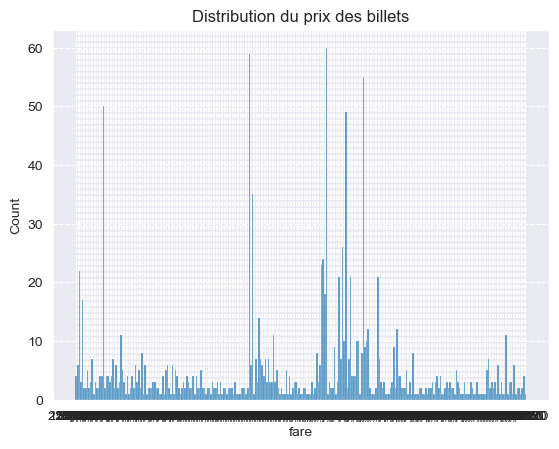

In [17]:
sn.set_style("darkgrid", {'grid.linestyle': '--'})
sn.histplot(df['fare'], bins=10)
plt.title("Distribution du prix des billets")
plt.show()

## Boîte à moustache du prix en fonction de la classe (Boxplot)

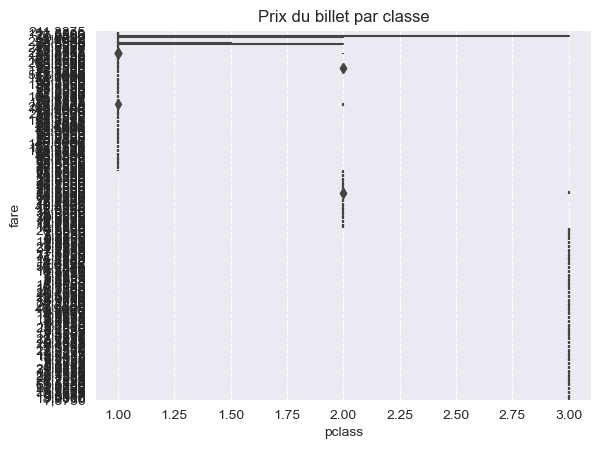

In [18]:
sn.boxplot(x='pclass', y='fare', data=df)
plt.title('Prix du billet par classe')
plt.show()

## Diagramme en nuage de points des âges en fonction de la classe et de la survie (scatterplot de seaborn)

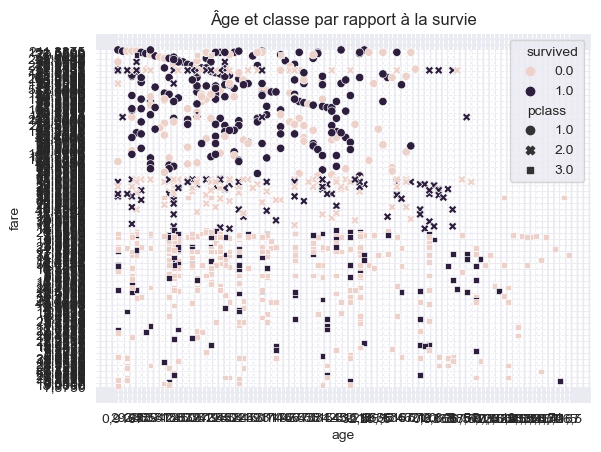

In [19]:
sn.scatterplot(x='age', y='fare', hue='survived', style='pclass', data=df)
plt.title("Âge et classe par rapport à la survie")
plt.show()

## Remplir les âges manquants avec la médiane

In [20]:
df['age'].fillna(df['age'].median(), inplace=True)
df['age'].isnull().sum()

TypeError: could not convert string to float: '0,9167'